## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

## 데이터 전처리

In [3]:
df_notnull = df[df["Insulin"] > 0].copy()
df_null = df[df["Insulin"] == 0].copy()
print(df_notnull.shape)
print(df_null.shape)

(394, 9)
(374, 9)


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
label_name = 'Insulin'

X_train = df_notnull[feature_names]
X_test = df_null[feature_names]

In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [7]:
model.fit(X_train, df_notnull[label_name])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [8]:
insulin = model.predict(X_test)
df_null[label_name] = insulin

In [9]:
df_fill = pd.concat([df_notnull, df_null])
df_fill = df_fill.sort_index()
df_fill.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,185.175,33.6,0.627,50,1
1,1,85,66,29,52.017,26.6,0.351,31,0
2,8,183,64,0,278.652,23.3,0.672,32,1
3,1,89,66,23,94.000,28.1,0.167,21,0
4,0,137,40,35,168.000,43.1,2.288,33,1


In [10]:
df = df_fill

In [11]:
df["Age_origin"] = df["Age"]
df["Age"] = pd.np.log(df["Age_origin"] + 1)

## 학습, 예측 데이터셋 나누기

In [12]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [13]:
# 파이썬 기초에서 다룬 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count]
test = df[split_count:]

## 학습, 예측에 사용할 컬럼

In [14]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = df.columns[:-1].to_list()
feature_names = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 정답값이자 예측해야 될 값

In [15]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [16]:
# 학습 세트 만들기 예) 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,185.175,33.6,0.627,3.931826
1,1,85,66,29,52.017,26.6,0.351,3.465736
2,8,183,64,0,278.652,23.3,0.672,3.496508
3,1,89,66,23,94.000,28.1,0.167,3.091042
4,0,137,40,35,168.000,43.1,2.288,3.526361


In [17]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)

(614,)


In [18]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]

In [19]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
print(y_test.shape)

(154,)


## 머신러닝 알고리즘 가져오기

In [20]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(min_samples_leaf=10)
# model

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_features=0.9)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 예측
* 실전 시험문제(X_train)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [23]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)

In [24]:
# from sklearn.tree import plot_tree
# from sklearn.tree import export_graphviz

# plt.figure(figsize=(20, 20))
# tree = plot_tree(model, 
#                  feature_names=feature_names, 
#                  filled=True,
#                  fontsize=10)

In [25]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                            feature_names = feature_names,
#                            filled=True)
# graphviz.Source(dot_tree)

In [26]:
# 피처의 중요도를 추출하기
feature_importance = model.feature_importances_
feature_importance

array([0.05487635, 0.26885734, 0.07598013, 0.0517784 , 0.17243555,
       0.16683356, 0.10994371, 0.09929497])

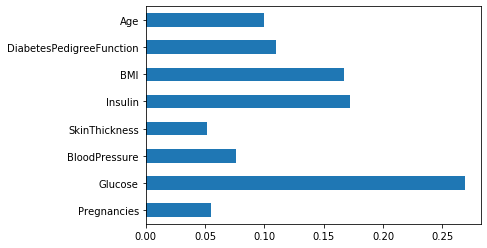

In [27]:
# 피처의 중요도 시각화 하기
pd.Series(feature_importance, index=feature_names).plot.barh()

## 정확도(Accuracy) 측정하기

In [28]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다. 
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
diff_count = abs(test[label_name] - y_predict).sum()
diff_count

35

In [29]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.
((len(y_predict) - diff_count) / len(y_predict)) * 100

77.27272727272727

In [30]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

77.27272727272727

In [31]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test)*100

77.27272727272727

## confusion_matrix 그리기

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_predict, y_test)
cm

array([[85, 21],
       [14, 34]])

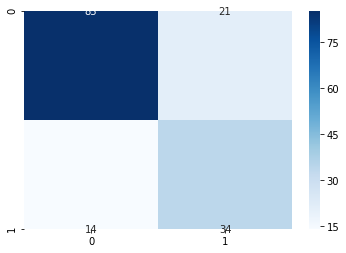

In [33]:
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")

## 분류평가지표
* [분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도)](https://sumniya.tistory.com/26)
* [분류모델 (Classification)의 성능 평가](https://bcho.tistory.com/1206)

In [34]:
# classification_report 를 출력합니다.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [35]:
# precision    recall  f1-score   support

#            0       0.78      0.90      0.84        99
#            1       0.75      0.55      0.63        55

#     accuracy                           0.77       154
#    macro avg       0.77      0.72      0.73       154
# weighted avg       0.77      0.77      0.76       154